# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# we use pairplot instead of matplotlib as it provides better graphs
from scipy.stats import skew


In [33]:
#Load Data
df=pd.read_csv("C:\\Users\\eg1\\Downloads\\dataset\\dataset\\Advertising.csv")
print(df.head(6))
print("\n")
print(df.info())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
5    8.7   48.9       75.0    7.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
800


## Plotting The relation of Each Value to Sales

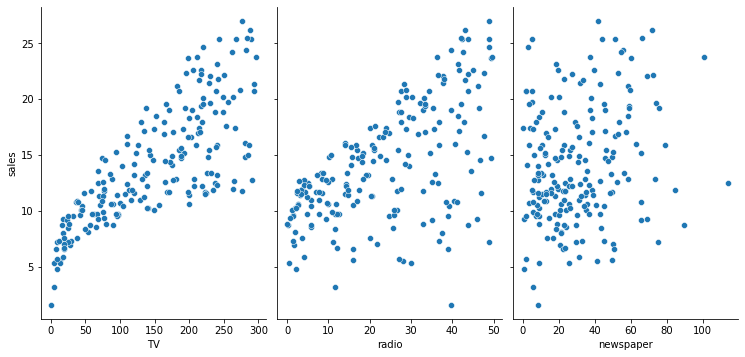

In [15]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=5,aspect=.7)

## Multiple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Split as x and y
x=df.drop('sales',axis=1)
y=df['sales']
# split dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr1=LinearRegression()
lr1.fit(x_train,y_train)
# Print the coefficients and intercept
print(lr1.intercept_)
print("TV:", lr1.coef_[0])
print("Radio:", lr1.coef_[0])
print("NewsPaper:", lr1.coef_[0])

2.9948930304953336
TV: 0.04458402011996426
Radio: 0.04458402011996426
NewsPaper: 0.04458402011996426


### Prediction Using Linear Regression

In [45]:
y_pred = lr1.predict(x_test)
# Printing Accuracy of model
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 86.01


### Plotting the Predicted Values

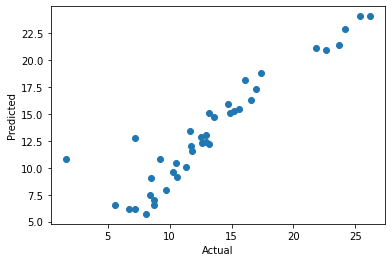

In [48]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

## Plotting the Regression Line

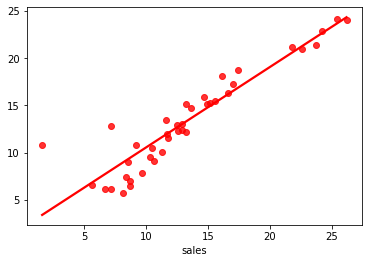

In [49]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


## Testing Model Accuracy

In [55]:
# We reconstruct the model in olsmod
import statsmodels.api as sm
x_temp = sm.add_constant(x)
olsmod = sm.OLS(y,x_temp).fit()

In [59]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)
if (olsmod.f_pvalue < 0.05):
    print("The f_pvalue is less that 0.05 and thus our model is accurate")

F-statistic: 570.2707036590941
Probability of observing value at least as high as F-statistic: 1.5752272560924787e-96
The f_pvalue is less that 0.05 and thus our model is accurate


In [58]:
print(olsmod.pvalues)
for val in olsmod.pvalues:
    if (val < 0.05):
        print("This value affects the price")


const        1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64
This value affects the price
This value affects the price
This value affects the price
